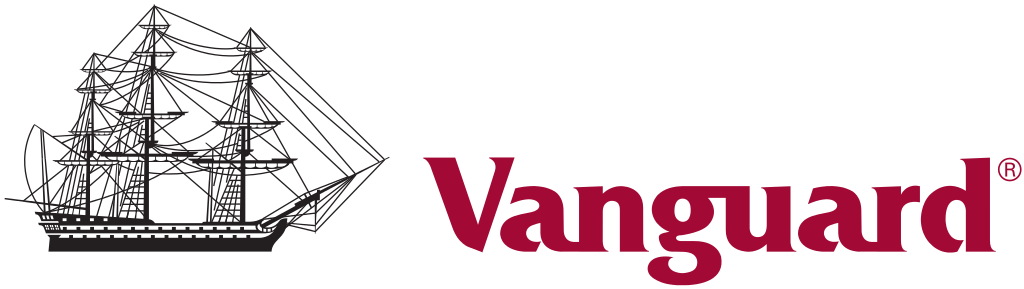

<h1 style="color: #8B2331;">VANGUARD A/B Testing  - EDA</h1>
<h2 style="color: #8B2331;">Insights into the experiment's demographics, behaviors, and balance trends.</h2>

<h1 style="color: #8B2331;">0 | Libraries and Dataset</h1>

In [4]:
# Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Statistical Analysis
import statsmodels.api as sm
from scipy.stats import stats, kurtosis, chi2_contingency
from scipy.stats import probplot, chi2_contingency, skew
from scipy.stats.contingency import association
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline  

# Show all columns in pandas
pd.set_option('display.max_columns', None)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_pickle("clean_vanguard.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317235 entries, 0 to 637535
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   client_id        317235 non-null  int64         
 1   control_test     317235 non-null  object        
 2   session_id       317235 non-null  object        
 3   client_dev_id    317235 non-null  object        
 4   process_step     317235 non-null  category      
 5   date_time        317235 non-null  datetime64[ns]
 6   age              317235 non-null  float64       
 7   age_group        317123 non-null  category      
 8   gender           317235 non-null  object        
 9   balance          317235 non-null  float64       
 10  balance_segment  317235 non-null  category      
 11  num_accts        317235 non-null  Int64         
 12  tenure_yr        317235 non-null  Int64         
 13  tenure_mo        317235 non-null  Int64         
 14  num_logons_6m    317235 n

<h1 style="color: #8B2331;"> 1 | Summary Statistics</h1>

In [7]:
summary_stats = df[['age', 'balance', 'num_accts', 'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m']].describe().round(2)
display(summary_stats)

age      balance  num_accts  tenure_yr  tenure_mo  num_logons_6m  \
count  317235.00    317235.00   317235.0   317235.0   317235.0       317235.0   
mean       48.51    160747.35       2.26      12.17     152.08           6.27   
std        15.66    340820.69       0.54       6.96      83.18           2.18   
min         0.00         0.00        0.0        0.0        0.0            0.0   
25%        34.50     41009.55        2.0        6.0       82.0            4.0   
50%        50.00     69056.52        2.0       11.0      137.0            6.0   
75%        61.00    151082.86        2.0       16.0      193.0            9.0   
max        96.00  16320040.15        7.0       55.0      669.0            9.0   

       calls_6m  
count  317235.0  
mean       3.23  
std        2.19  
min         0.0  
25%         1.0  
50%         3.0  
75%         6.0  
max         6.0

In [8]:
mean_values = df[['age', 'balance', 'num_accts', 'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m']].mean()
median_values = df[['age', 'balance', 'num_accts', 'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m']].median()
mode_values = df[['age', 'balance', 'num_accts', 'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m']].mode().iloc[0]

summary_stats_mmm = pd.DataFrame({
    'Mean': round(mean_values, 2),
    'Median': median_values,
    'Mode': mode_values
})

display(summary_stats_mmm)        # Balance shows + skew: high mean compared to the median suggests some higher balances skewing the data.

Mean    Median  Mode
age                48.51      50.0  58.5
balance        160747.35  69056.52   0.0
num_accts           2.26       2.0   2.0
tenure_yr          12.17      11.0   6.0
tenure_mo         152.08     137.0  58.0
num_logons_6m       6.27       6.0   9.0
calls_6m            3.23       3.0   6.0

In [9]:
overall_counts = df['age_group'].value_counts(normalize=True).round(2)

control_counts = df[df['control_test'].str.lower() == 'control']['age_group'].value_counts(normalize=True).round(2)
test_counts = df[df['control_test'].str.lower() == 'test']['age_group'].value_counts(normalize=True).round(2)

summary_age_groups = pd.DataFrame({
    'Overall': overall_counts,
    'Control': control_counts,
    'Test': test_counts
})
display(summary_age_groups)

Overall  Control  Test
age_group                        
61+           0.28     0.27  0.28
51-60         0.23     0.23  0.23
31-40         0.17     0.18  0.17
41-50         0.16     0.17  0.16
16-30         0.16     0.16  0.16

In [10]:
overall_counts = df['gender'].value_counts(normalize=True).round(2)

control_counts = df[df['control_test'].str.lower() == 'control']['gender'].value_counts(normalize=True).round(2)
test_counts = df[df['control_test'].str.lower() == 'test']['gender'].value_counts(normalize=True).round(2)

summary_gender = pd.DataFrame({
    'Overall': overall_counts,
    'Control': control_counts,
    'Test': test_counts
})
display(summary_gender)

Overall  Control  Test
gender                        
F          0.32     0.32  0.33
M          0.34     0.34  0.34
U          0.34     0.34  0.34

In [11]:
overall_counts = df['process_step'].value_counts(normalize=True).round(2)

control_counts = df[df['control_test'].str.lower() == 'control']['process_step'].value_counts(normalize=True).round(2)
test_counts = df[df['control_test'].str.lower() == 'test']['process_step'].value_counts(normalize=True).round(2)

summary_steps = pd.DataFrame({
    'Overall': overall_counts,
    'Control': control_counts,
    'Test': test_counts
}).fillna(0) 

display(summary_steps)

Overall  Control  Test
process_step                        
0_start          0.32     0.32  0.32
1_step           0.22     0.21  0.22
2_step           0.18     0.18  0.17
3_step           0.15     0.16  0.15
4_confirm        0.14     0.12  0.14

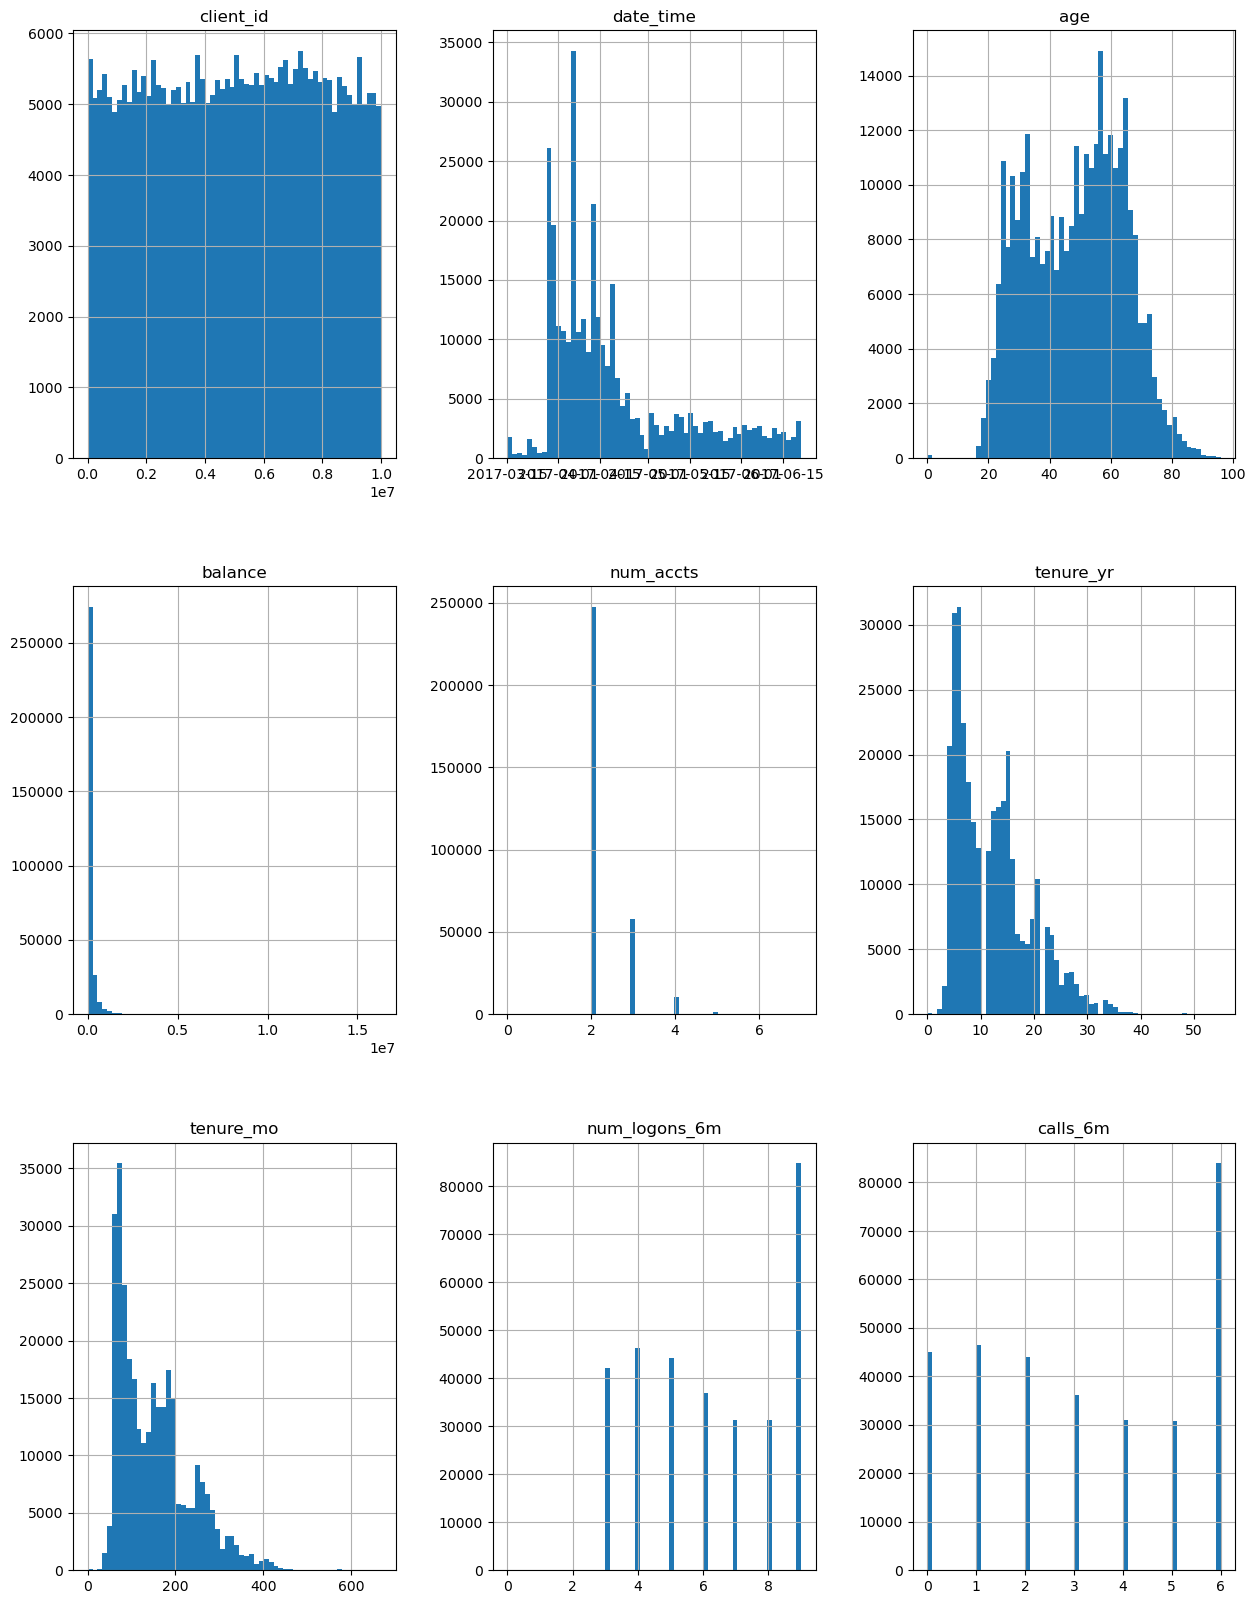

In [12]:
df.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);
plt.show()

<h1 style="color: #8B2331;">2 | Demographic Analysis</h1>

<h2 style="color: #8B2331;"> 2.1 Age</h2>

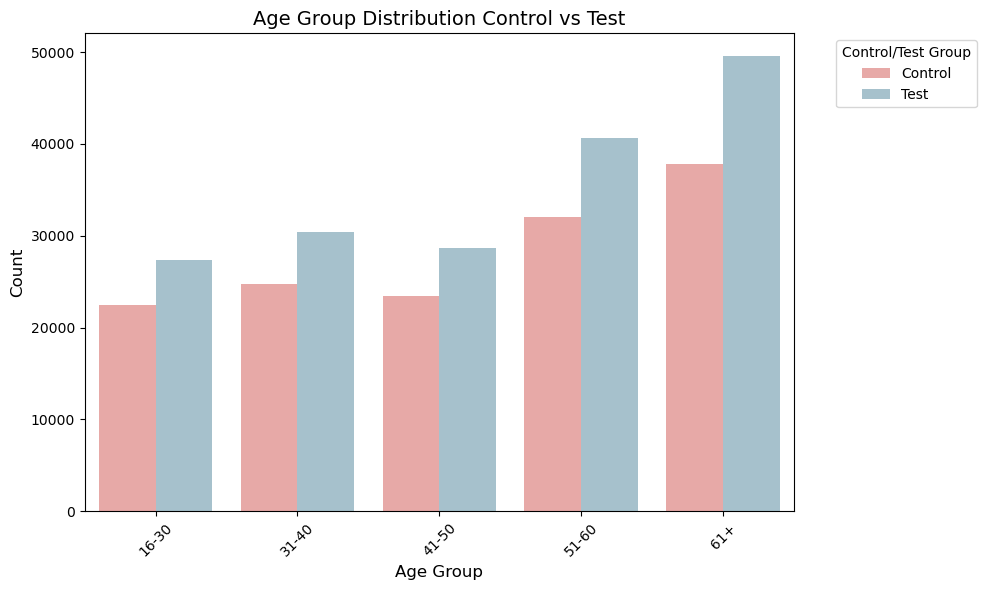

In [15]:
plt.figure(figsize=(10, 6))
vanguard_colors_subtle = ['#f29f9c', '#a0c3d2']
sns.countplot(x='age_group', hue='control_test', data=df, palette=vanguard_colors_subtle, hue_order=['Control', 'Test'])
plt.title('Age Group Distribution Control vs Test', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Control/Test Group', loc='upper left', bbox_to_anchor=(1.05, 1), labels=['Control', 'Test'])
plt.tight_layout()
plt.show()

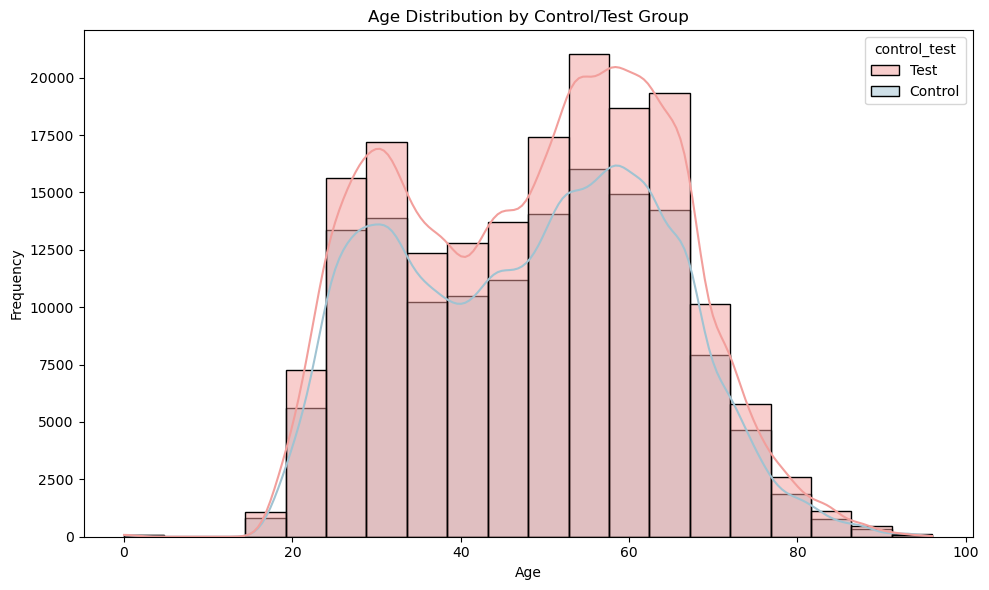

In [16]:
# There's a similar age distribution across test and control groups, with the majority of users falling in the 25-65 age range
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='control_test', kde=True, bins=20, palette=vanguard_colors_subtle)
plt.title('Age Distribution by Control/Test Group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

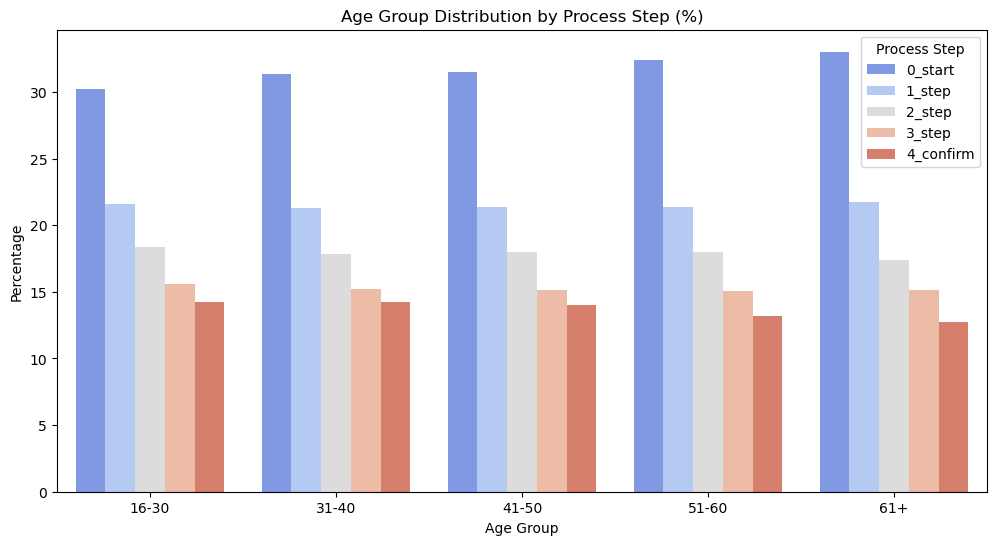

In [17]:
age_group_process_step = pd.crosstab(df['age_group'], df['process_step'], normalize='index') * 100

age_group_process_step = age_group_process_step.reset_index().melt(id_vars='age_group', var_name='process_step', value_name='percentage')

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='percentage', hue='process_step', data=age_group_process_step, palette="coolwarm")
plt.title('Age Group Distribution by Process Step (%)')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Process Step')
plt.show()

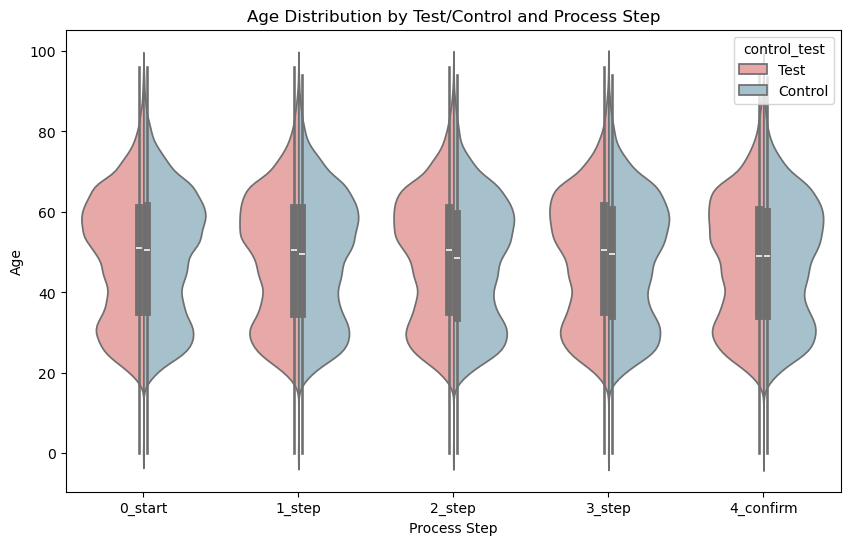

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='process_step', y='age', hue='control_test', data=df, split=True, palette=vanguard_colors_subtle)
plt.title('Age Distribution by Control/Test and Process Step')
plt.xlabel('Process Step')
plt.ylabel('Age')
plt.show()

<h2 style="color: #8B2331;"> 2.2 Gender</h2>

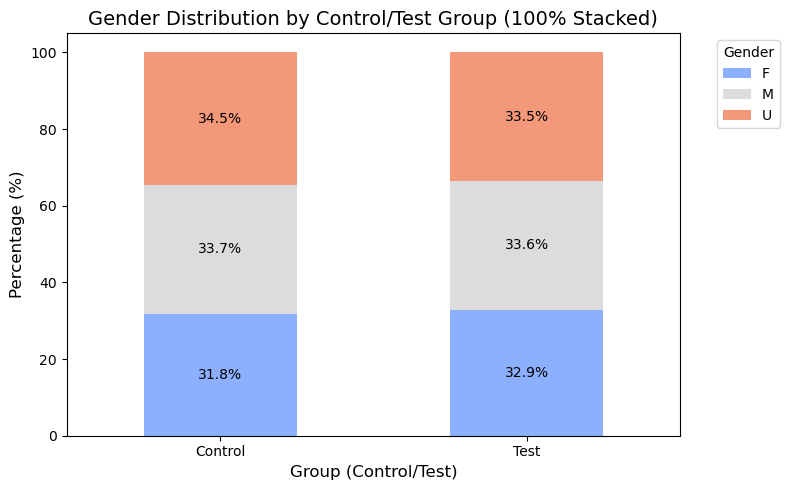

In [20]:
pivot_data = df.groupby(['control_test', 'gender']).size().unstack(fill_value=0)
percent_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

palette = sns.color_palette("coolwarm", n_colors=len(percent_data.columns))
ax = percent_data.plot(kind='bar', stacked=True, figsize=(8, 5), color=palette)
plt.title('Gender Distribution by Control/Test Group (100% Stacked)', fontsize=14)
plt.xlabel('Group (Control/Test)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
for p in ax.patches:
    height = p.get_height()  
    x = p.get_x() + p.get_width() / 2  
    y = p.get_y() + height / 2  
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

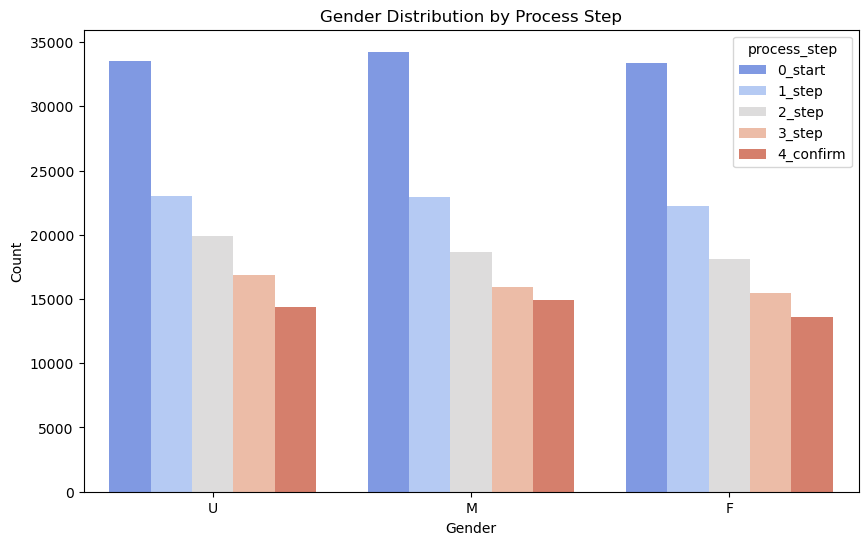

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='process_step', data=df, palette="coolwarm")
plt.title('Gender Distribution by Process Step')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<h1 style="color: #8B2331;">3 | Client Behavior Analysis</h1>

<h2 style="color: #8B2331;"> 3.1 Balance</h2>

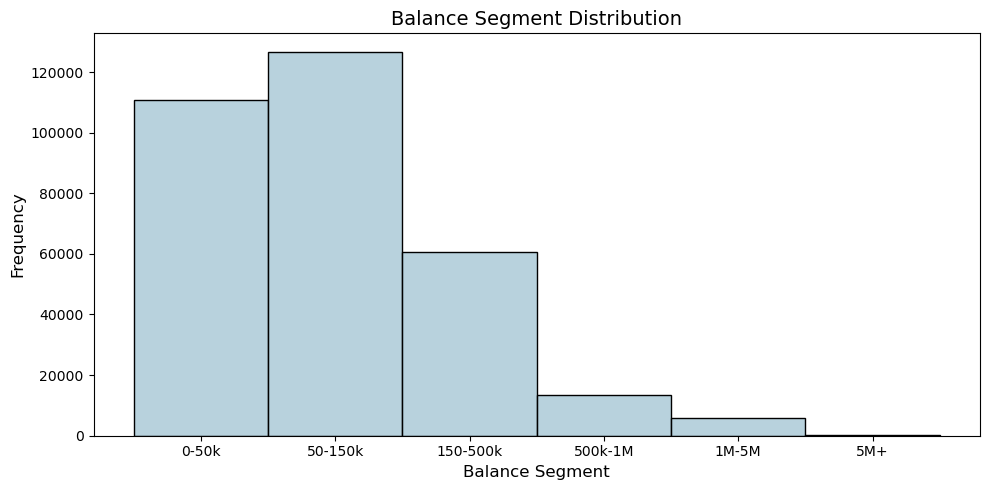

In [24]:
vanguard_colors_1 = ['#a0c3d2']
plt.figure(figsize=(10, 5))
sns.histplot(df['balance_segment'], kde=False, bins=30, color=vanguard_colors_1[0])
plt.title('Balance Segment Distribution', fontsize=14)
plt.xlabel('Balance Segment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
skewed_data = df.balance[df.balance > 0]  # Chebyshev’s Theorem helps determine where most of your data fall within a distribution of values
mean = skewed_data.mean()
std = skewed_data.std()

points_within_2_std = skewed_data[(skewed_data < (mean + 2 * std)) & (skewed_data > (mean - 2 * std))]
proportion = round(len(points_within_2_std) * 100 / len(skewed_data), 1)
print(f"{proportion}% of the balance falls within 2 standard deviations from the mean")

97.5% of the balance falls within 2 standard deviations from the mean


In [26]:
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std
min_balance = df[(df['balance'] > 0) & (df['balance_segment'] == "0-50k")].balance.min()
print(f"The range where 97.5% of the data falls is between {min_balance:.2f} and {upper_bound:.2f}")

The range where 97.5% of the data falls is between 23789.44 and 842522.97


Skewness of balance: 15.681309772134531


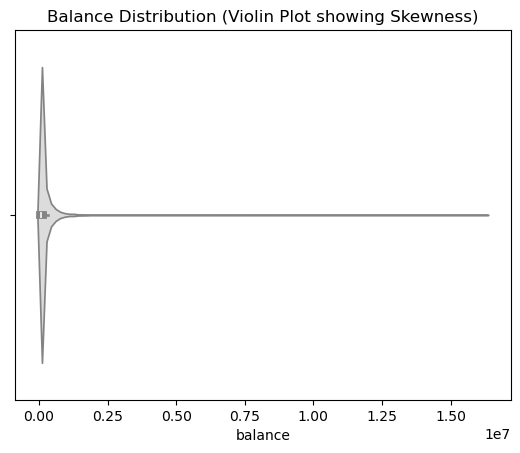

In [27]:
skew_value = skew(df['balance'].dropna())  
print(f"Skewness of balance: {skew_value}")

sns.violinplot(x=df['balance'], palette="coolwarm")
plt.title("Balance Distribution (Violin Plot showing Skewness)")
plt.show()

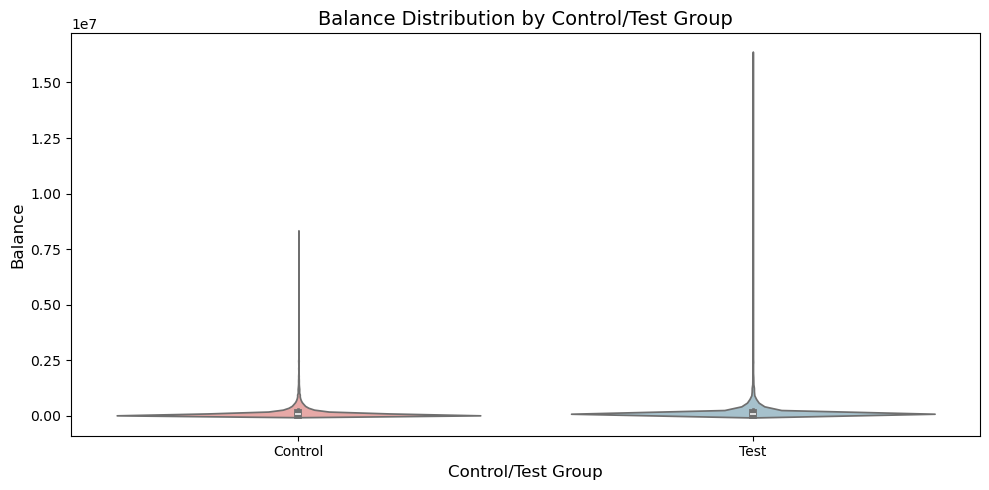

In [28]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="control_test", y="balance", data=df, palette=vanguard_colors_subtle, order=["Control", "Test"])
plt.title("Balance Distribution by Control/Test Group", fontsize=14)
plt.xlabel('Control/Test Group', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.tight_layout()
plt.show()

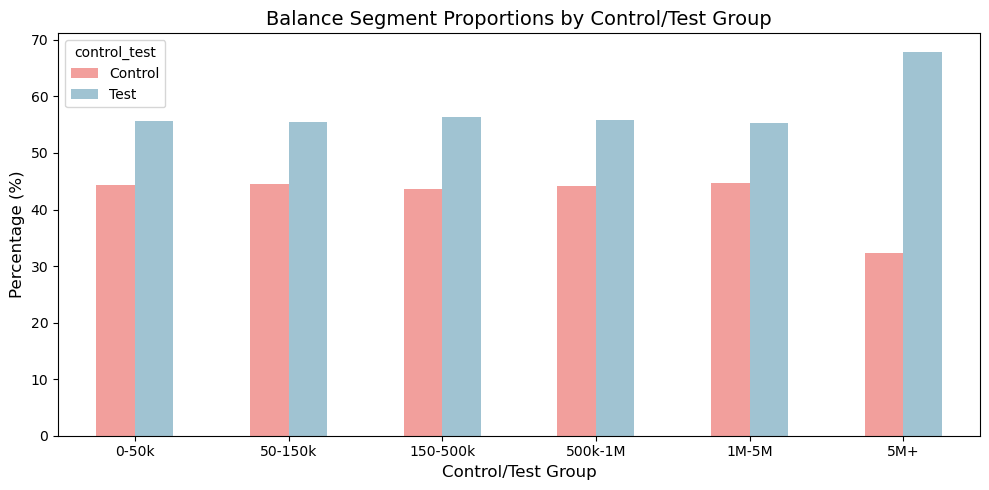

In [29]:
balance_percent = df.groupby(['balance_segment', 'control_test']).size().unstack(fill_value=0)
balance_percent = balance_percent.div(balance_percent.sum(axis=1), axis=0) * 100

balance_percent.plot(kind='bar', figsize=(10, 5), color=['#f29f9c', '#a0c3d2'])

plt.title('Balance Segment Proportions by Control/Test Group', fontsize=14)
plt.xlabel('Control/Test Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h2 style="color: #8B2331;"> 3.2 No of Accounts</h2>

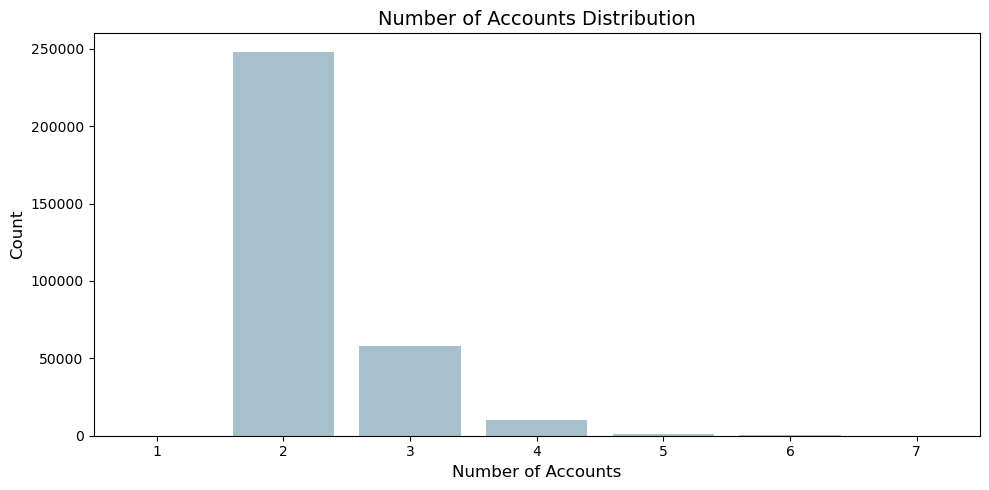

In [31]:
df_no_of_accounts = df[df['num_accts'] > 0]
account_counts = df_no_of_accounts['num_accts'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=account_counts.index, y=account_counts.values, palette=vanguard_colors_1)
plt.title('Number of Accounts Distribution', fontsize=14)
plt.xlabel('Number of Accounts', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

<h2 style="color: #8B2331;"> 3.3 Client Tenure (New vs. Long-standing)</h2>

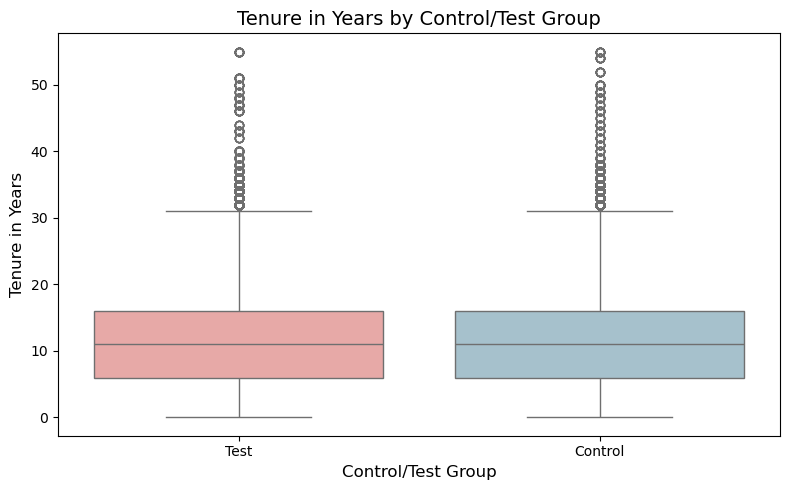

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='control_test', y='tenure_yr', data=df, palette=vanguard_colors_subtle)
plt.title('Tenure in Years by Control/Test Group', fontsize=14)
plt.xlabel('Control/Test Group', fontsize=12)
plt.ylabel('Tenure in Years', fontsize=12)
plt.tight_layout()
plt.show()

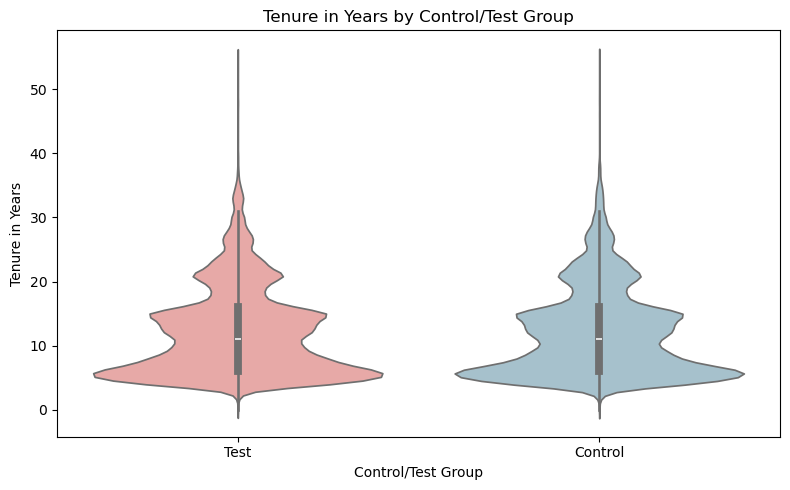

In [34]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='control_test', y='tenure_yr', data=df, palette=vanguard_colors_subtle)
plt.title('Tenure in Years by Control/Test Group')
plt.xlabel('Control/Test Group')
plt.ylabel('Tenure in Years')
plt.tight_layout()
plt.show()

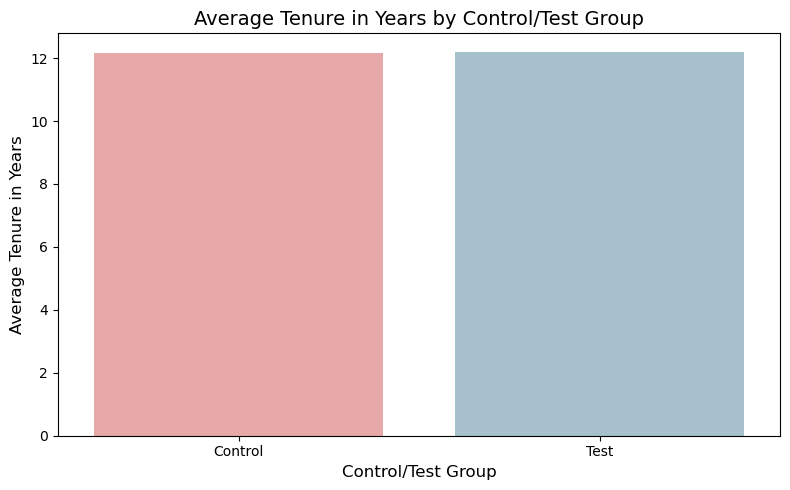

In [35]:
mean_tenure = df.groupby('control_test')['tenure_yr'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=mean_tenure.index, y=mean_tenure.values, palette=vanguard_colors_subtle)
plt.title('Average Tenure in Years by Control/Test Group', fontsize=14)
plt.xlabel('Control/Test Group', fontsize=12)
plt.ylabel('Average Tenure in Years', fontsize=12)
plt.tight_layout()
plt.show()

<h2 style="color: #8B2331;">3.4 Interaction Frequency (Logins and Calls in Last 6 Months)</h2>

<Figure size 1000x600 with 0 Axes>

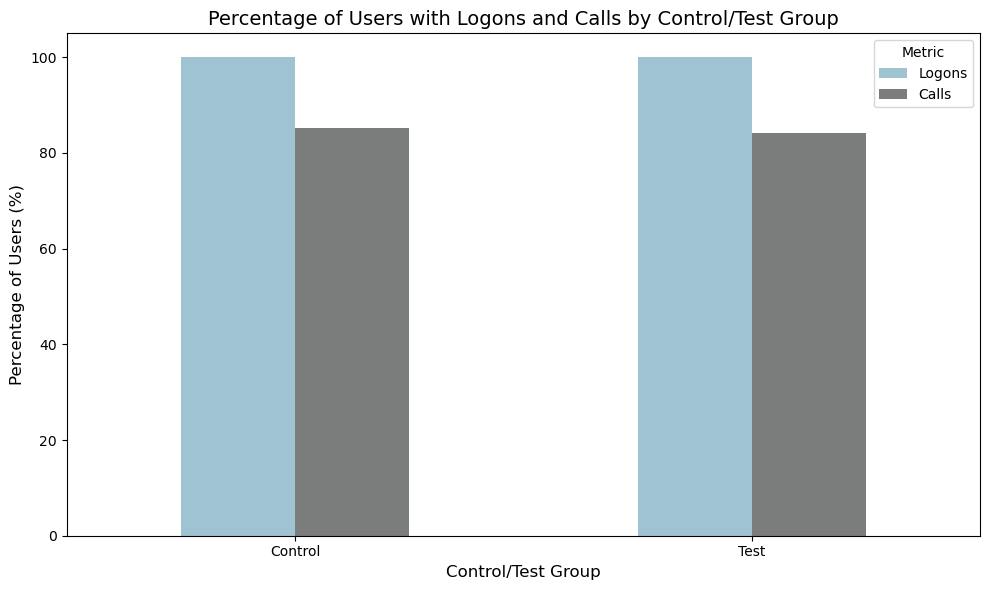

Logons  Calls
control_test               
Control        99.98  85.14
Test           99.97  84.25

In [37]:
total_users = df.groupby('control_test')['client_id'].nunique()

logons_users = df[df['num_logons_6m'] > 0].groupby('control_test')['client_id'].nunique()
calls_users = df[df['calls_6m'] > 0].groupby('control_test')['client_id'].nunique()

logons_percent = (logons_users / total_users * 100).sort_index()
calls_percent = (calls_users / total_users * 100).sort_index()

percentages_df = pd.DataFrame({'Logons': logons_percent, 'Calls': calls_percent})

plt.figure(figsize=(10, 6))
ax = percentages_df.plot(kind='bar', color=['#a0c3d2', '#7b7d7d'], figsize=(10, 6))
plt.title('Percentage of Users with Logons and Calls by Control/Test Group', fontsize=14)
plt.xlabel('Control/Test Group', fontsize=12)
plt.ylabel('Percentage of Users (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

display(percentages_df.round(2))

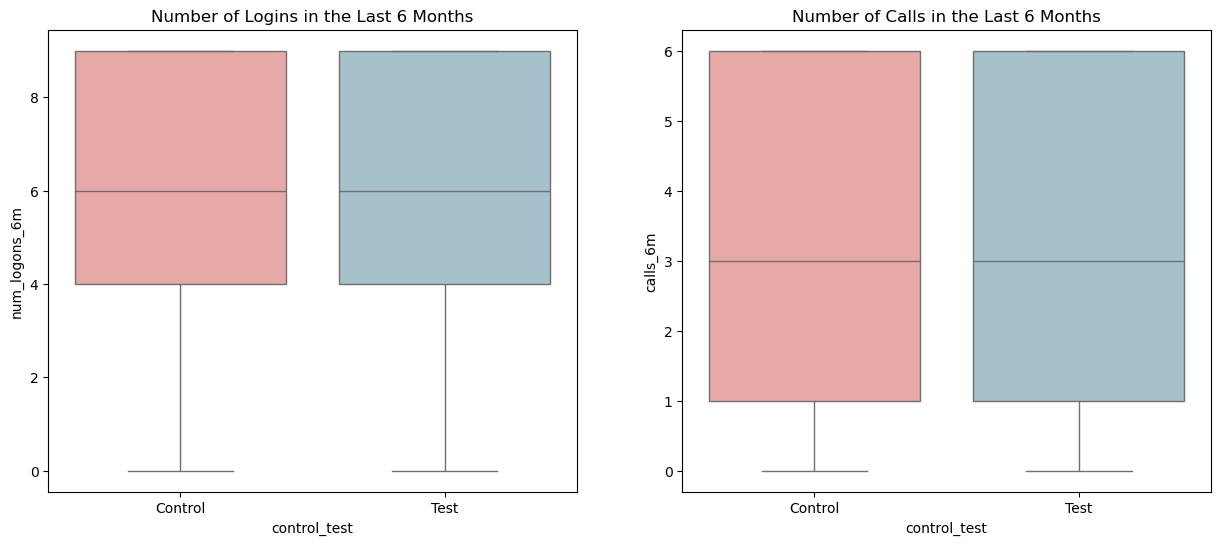

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=df, x='control_test', y='num_logons_6m', ax=axes[0], palette=vanguard_colors_subtle, order=['Control', 'Test'])
axes[0].set_title('Number of Logins in the Last 6 Months')
sns.boxplot(data=df, x='control_test', y='calls_6m', ax=axes[1], palette=vanguard_colors_subtle, order=['Control', 'Test'])
axes[1].set_title('Number of Calls in the Last 6 Months')
plt.show()

In [39]:
interaction_frequency_corr = df['num_logons_6m'].corr(df['calls_6m'])
print( f"Pearson: {interaction_frequency_corr.round(2)}")

Pearson: 0.99


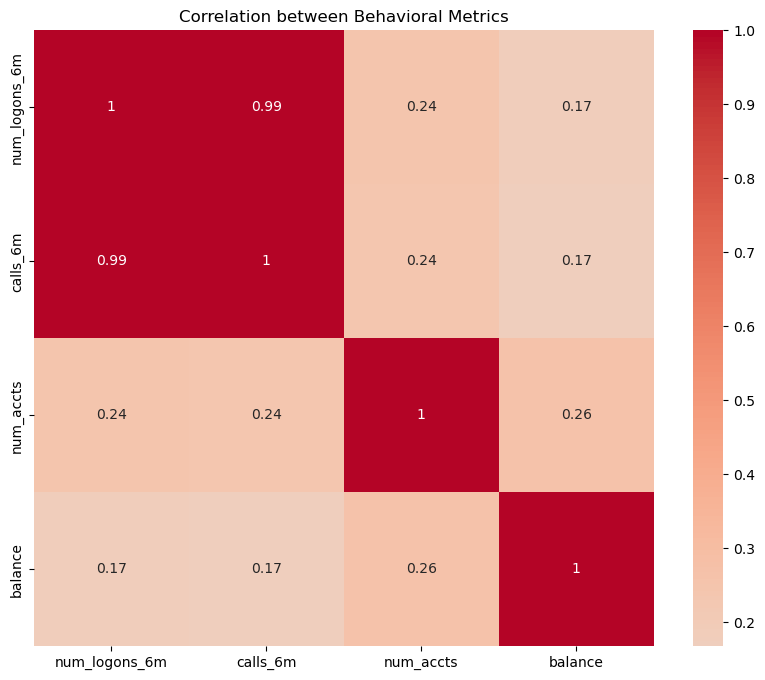

Behavioral Metrics Summary:


num_logons_6m  calls_6m  num_accts       balance
count       317235.0  317235.0   317235.0  3.172350e+05
mean        6.267389  3.230104   2.261377  1.607473e+05
std         2.182548  2.194422   0.542062  3.408207e+05
min              0.0       0.0        0.0  0.000000e+00
25%              4.0       1.0        2.0  4.100955e+04
50%              6.0       3.0        2.0  6.905652e+04
75%              9.0       6.0        2.0  1.510829e+05
max              9.0       6.0        7.0  1.632004e+07

In [40]:
behavioral_metrics = df[['num_logons_6m', 'calls_6m', 'num_accts', 'balance']].copy()

correlation_matrix = behavioral_metrics.corr()  

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Behavioral Metrics')
plt.show()

print("\
Behavioral Metrics Summary:")
display(behavioral_metrics.describe())

<h2 style="color: #8B2331;">3.5 Process_Steps</h2>

control_test
Test       176699
Control    140536
Name: count, dtype: int64


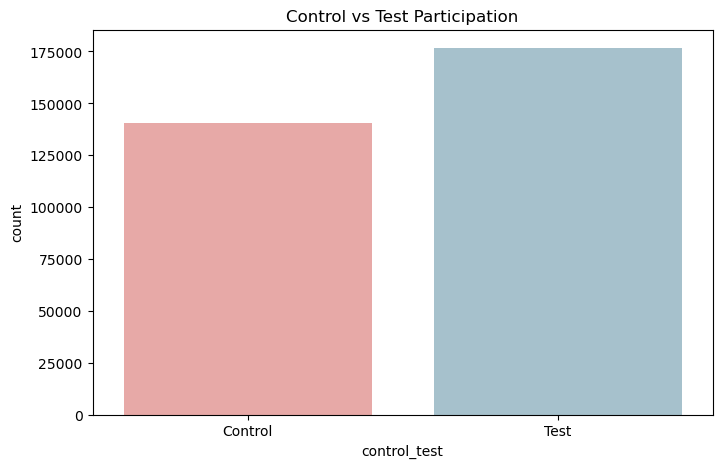

In [42]:
group_counts = df['control_test'].value_counts()
print(group_counts)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='control_test', palette=vanguard_colors_subtle, order = ['Control', 'Test'])
plt.title('Control vs Test Participation')
plt.show()

In [43]:
crosstab_col_percent = round(pd.crosstab(df['process_step'], df['control_test'], normalize='columns', margins=True) * 100, 2)
display(crosstab_col_percent) # Column-wise: what percentage of test or control is contributed by each process_step

control_test  Control   Test    All
process_step                       
0_start         32.29  31.56  31.89
1_step          21.02  21.88  21.50
2_step          18.34  17.49  17.86
3_step          16.01  14.58  15.21
4_confirm       12.34  14.49  13.53

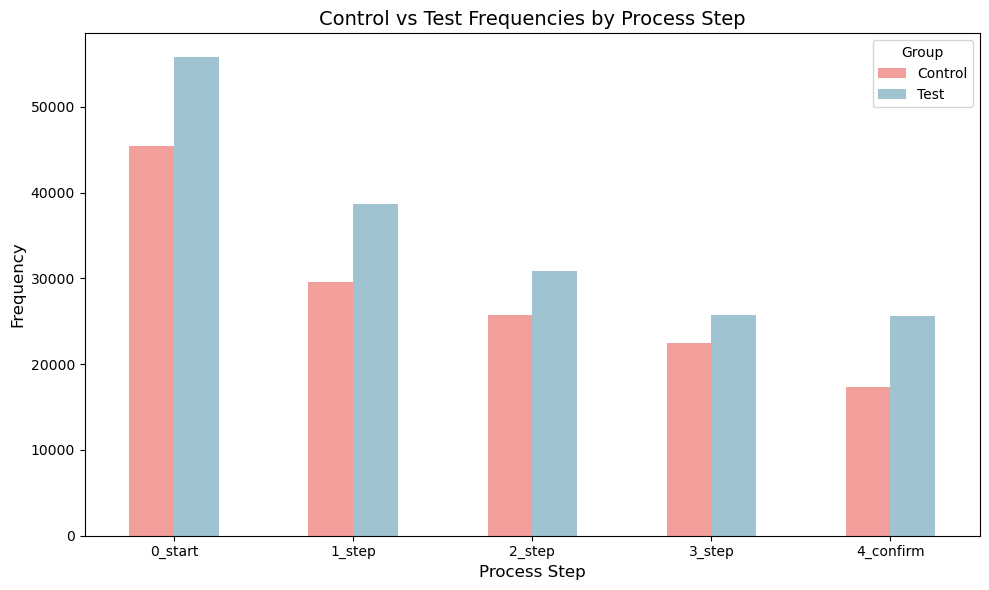

In [44]:
crosstab = pd.crosstab(df['process_step'], df['control_test'])
df['control_test'] = pd.Categorical(df['control_test'], categories=['Control', 'Test'], ordered=True)
crosstab = crosstab[['Control', 'Test']]
crosstab.plot(kind='bar', figsize=(10, 6), color=vanguard_colors_subtle)
plt.title('Control vs Test Frequencies by Process Step', fontsize=14)
plt.xlabel('Process Step', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Group', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

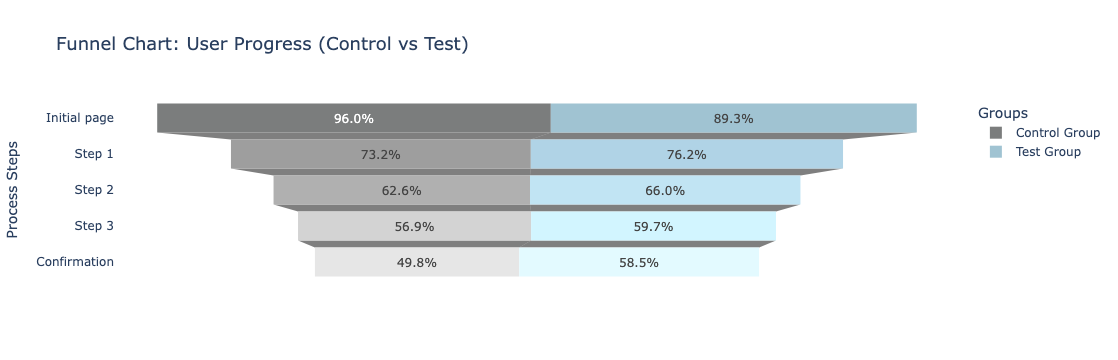

In [45]:
steps = ['Initial page', 'Step 1', 'Step 2', 'Step 3', 'Confirmation']
users_at_steps = df.groupby(['control_test', 'process_step'])['session_id'].nunique().unstack(fill_value=0)
total_users = df.groupby('control_test')['session_id'].nunique()

control_percentages = (users_at_steps.loc['Control'] / total_users['Control']) * 100
test_percentages = (users_at_steps.loc['Test'] / total_users['Test']) * 100

fig = go.Figure()
fig.add_trace(
    go.Funnel(name="Control Group",
        y=steps,
        x=control_percentages,
        text=[f"{percentage:.1f}%" for percentage in control_percentages],
        textinfo="text", 
        marker=dict(color=["#7B7D7D", "#9E9E9E", "#B0B0B0", "#D3D3D3", "#E6E6E6"]), 
    )
)
fig.add_trace(
    go.Funnel(
        name="Test Group",
        y=steps,
        x=test_percentages,
        text=[f"{percentage:.1f}%" for percentage in test_percentages],
        textinfo="text",
        marker=dict(color=[ "#a0c3d2", "#b0d3e6", "#c1e4f3", "#d2f5ff", "#e3faff"]), # for reds ["#C8102E", "#D32F2F", "#FF5722", "#FF7043", "#FFEBEE"]
    )
)
fig.update_layout(
    title="Funnel Chart: User Progress (Control vs Test)",
    title_font=dict(size=18),
    xaxis_title="Percentage of Users",
    yaxis_title="Process Steps",
    font=dict(size=12),
    plot_bgcolor="white", 
    legend_title="Groups",
)
fig.show()

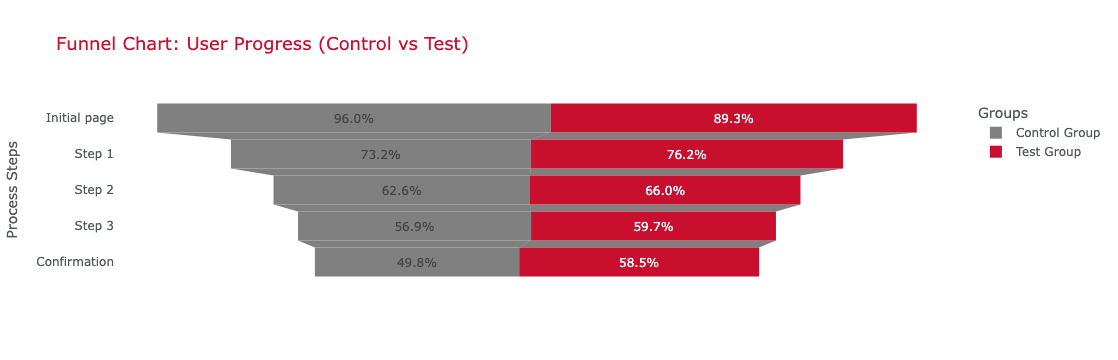

In [49]:
# Transparent png for ppt 

steps = ['Initial page', 'Step 1', 'Step 2', 'Step 3', 'Confirmation']

users_at_steps = df.groupby(['control_test', 'process_step'])['session_id'].nunique().unstack(fill_value=0)
total_users = df.groupby('control_test')['session_id'].nunique()
test_percentages = (users_at_steps.loc['Test'] / total_users['Test']) * 100
control_percentages = (users_at_steps.loc['Control'] / total_users['Control']) * 100

fig = go.Figure()
fig.add_trace(
    go.Funnel(
        name="Control Group",
        y=steps,
        x=control_percentages, 
        text=[f"{percentage:.1f}%" for percentage in control_percentages],
        textinfo="text", 
        marker=dict(color=["#808080", "#808080", "#808080", "#808080", "#808080"]),
    )
)
fig.add_trace(
    go.Funnel(
        name="Test Group",
        y=steps,
        x=test_percentages, 
        text=[f"{percentage:.1f}%" for percentage in test_percentages],
        textinfo="text", 
        marker=dict(color=["#C8102E", "#C8102E", "#C8102E", "#C8102E", "#C8102E"]),
    )
)
fig.update_layout(
    title="Funnel Chart: User Progress (Control vs Test)",
    title_font=dict(size=18, color="#C8102E"),
    xaxis_title="Percentage of Users",
    yaxis_title="Process Steps",
    font=dict(size=12, color="#54585A"),
    plot_bgcolor="rgba(255, 255, 255, 0)",   # Transparent background for the plot area
    paper_bgcolor="rgba(255, 255, 255, 0)",  # Transparent background for the entire figure
    legend_title="Groups",
    barmode="stack", 
)
fig.write_image("funnel_chart.png", width=800, height=600, scale=2)
fig.show()

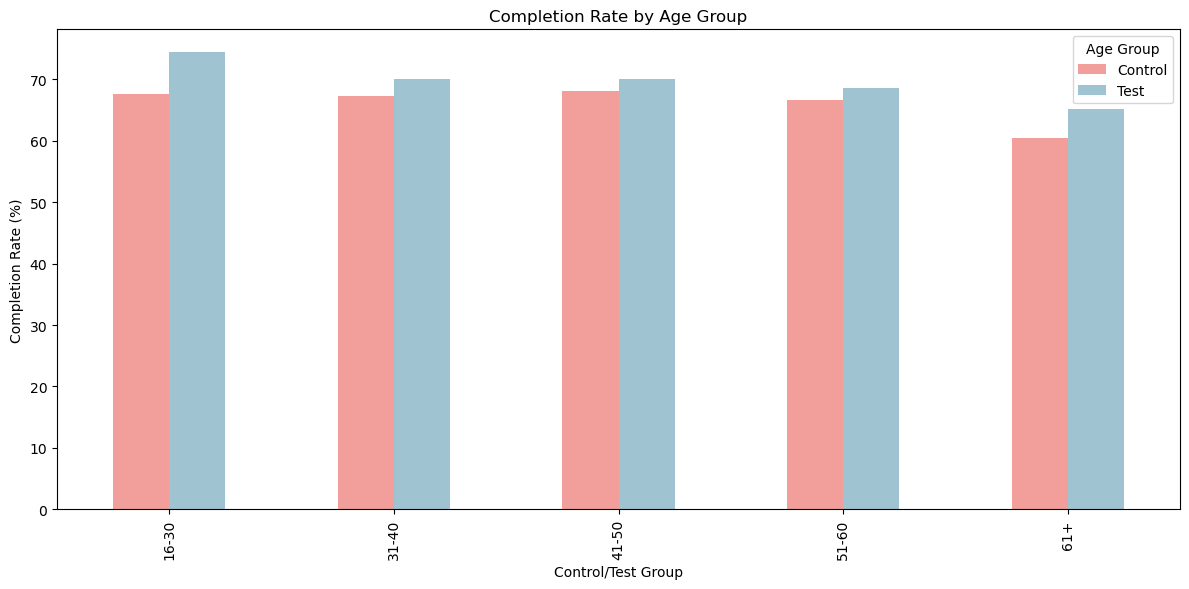

In [55]:
age_completion = df[df['process_step'] == '4_confirm'].groupby(['age_group', 'control_test'])['client_id'].nunique()
total_by_age = df.groupby(['control_test', 'age_group'])['client_id'].nunique()
age_completion_rate = (age_completion / total_by_age * 100).unstack()

age_completion_rate.plot(kind='bar', figsize=(12, 6), color=vanguard_colors_subtle)
plt.title('Completion Rate by Age Group')
plt.xlabel('Control/Test Group')

plt.ylabel('Completion Rate (%)')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

<h1 style="color: #8B2331;">4 | Key Insights</h1>

## **Demographics**
- The **average client age is 48.5 years**, with a wide range from **16 to 96 years**.
- **Gender distribution is fairly even**:  
  - **34% unknown**, **34% male**, **32% female**.

## **Balance Distribution**
- The average client holds **2 accounts** with a **mean total balance of $160,747**, though the data is heavily skewed by high balances.
- The **median balance is $69,056**, with most clients falling between **$24,000 and $842,000 (97.5% range)**.
- The **maximum balance reaches $16.3M**, highlighting significant outliers.
- The **test group exhibits more skewness** compared to the control.

## **Account Relationships**
- Clients **typically hold 2 accounts** (75% of clients).
- The number of accounts ranges from **1 to a maximum of 7**.

## **Tenure**
- The average client has been with Vanguard for **12 years**, with a maximum tenure of **55 years**.
- The **distribution of tenure is identical** between control and test groups.

## **Digital Engagement**
- Clients log in an average of **6 times over 6 months**.
- **75% of clients log in 9 or fewer times**, with the **top quartile being highly active (9+ logins)**.

## **Support Needs**
- Clients make an average of **3.2 calls per 6 months**.
- **75% of clients make 6 or fewer calls**.
- There’s a **strong correlation between logins and calls (Pearson = 0.99)**, with **logins occurring roughly twice as often as calls** (mean: **6.28 vs. 3.23**).
- The distribution is **consistent across control and test groups**.

## **Step Progression Efficiency**
- **Test group users progress more consistently** through the process, particularly in the **final step**.